In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [53]:
df = pd.read_csv("Employee.csv")

In [54]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [12]:
df.shape

(4653, 9)

In [14]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

**No missing values**

In [16]:
df.duplicated().sum()

1889

In [55]:
# Dropping duplicates 
df.drop_duplicates(inplace=True)
df.shape

(2764, 9)

The duplicates are eliminated with the intention of introducing novelty and viewing the dataset from a new perspective, as the duplicates weren't removed in the research paper.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


In [20]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [56]:
# Understanding the vlaues in each coloumn
sdf = []
for e, v in df.iteritems():
    col = {
        'Column': e,
        'Values': v.unique(),
        'Count': v.nunique()
    }
    sdf.append(col)
ndf =  pd.DataFrame(sdf)
ndf

,Column,Values,Count
0,Education,"[Bachelors, Masters, PHD]",3
1,JoiningYear,"[2017, 2013, 2014, 2016, 2015, 2012, 2018]",7
2,City,"[Bangalore, Pune, New Delhi]",3
3,PaymentTier,"[3, 1, 2]",3
4,Age,"[34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 3...",20
5,Gender,"[Male, Female]",2
6,EverBenched,"[No, Yes]",2
7,ExperienceInCurrentDomain,"[0, 3, 2, 5, 1, 4, 7, 6]",8
8,LeaveOrNot,"[0, 1]",2


# EDA

## Relation with LeaveOrNot

In [39]:
df["LeaveOrNot"].value_counts()

0    1676
1    1088
Name: LeaveOrNot, dtype: int64

In [41]:
df["Education"].value_counts()

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

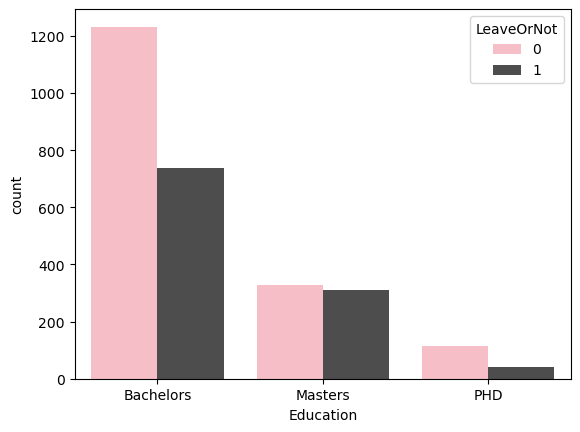

In [75]:
palt = ["#ffb6c1", "#4d4d4d"] 
sns.set_palette(palt)
sns.countplot(data=df, x= df["Education"], hue="LeaveOrNot")

We can see here people with **masters** are **more tend to leave** company, while not much can be said about people
with bachelors or PHD

In [127]:
df["JoiningYear"].value_counts()

2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

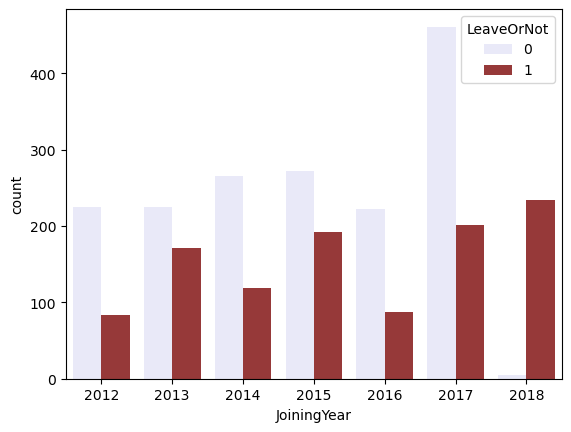

In [128]:
palt = ["#e6e6fa", "#a52a2a"] 
sns.set_palette(palt)
sns.countplot(data=df, x= df["JoiningYear"], hue="LeaveOrNot")

We can understand from here that most of the people have left who joined in the year 2018, and the trend
of **leaving** company seems to be **increasing in the last 2-3 years** in the data.

In [129]:
df["City"].value_counts()

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

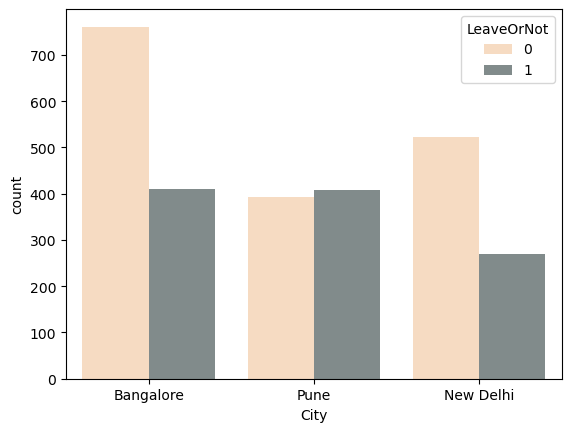

In [130]:
palt = ["#ffdab9", "#7f8c8d"] 
sns.set_palette(palt)
sns.countplot(data=df, x= df["City"], hue="LeaveOrNot")

Here we can understand the trend that **more the half** of the people in **pune** have left the company from the provided data

In [131]:
df["PaymentTier"].value_counts()

3    1976
2     570
1     218
Name: PaymentTier, dtype: int64

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

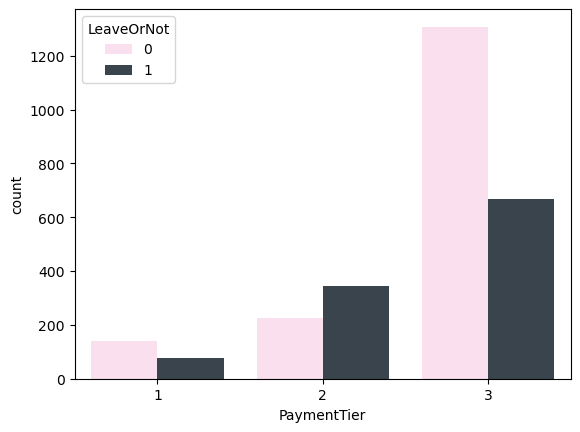

In [132]:
palt = ["#fedbef", "#36454f"] 
sns.set_palette(palt)
sns.countplot(data=df, x= df["PaymentTier"], hue="LeaveOrNot")

Here we can understad that people with **tier 2 salary** are more tend to **leave**

In [133]:
df["Age"].value_counts()

28    365
27    218
30    186
29    180
26    179
25    167
24    161
36    121
40    119
37    119
34    118
38    117
39    115
31    115
33    114
32    113
35    110
41     75
23     41
22     31
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

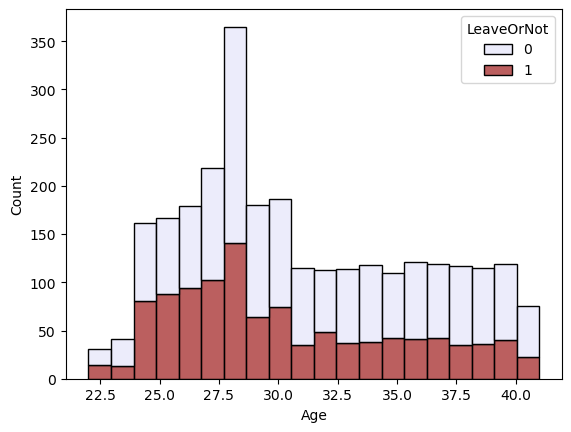

In [134]:
palt = ["#e6e6fa", "#a52a2a"] 
sns.set_palette(palt)
sns.histplot(data=df, x=df["Age"],hue="LeaveOrNot", bins=20, multiple="stack")

We can somewhat understand that employees in age **22-27** are more willing to **leave** than peple of other age group

In [135]:
df["Gender"].value_counts()

Male      1529
Female    1235
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

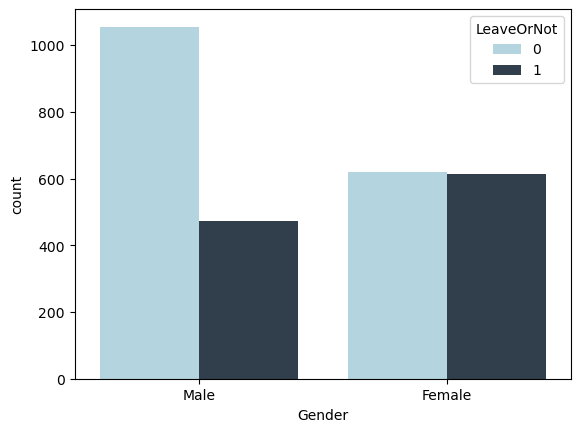

In [136]:
palt = ["#add8e6", "#2c3e50"] 
sns.set_palette(palt)
sns.countplot(data=df, x= df["Gender"], hue="LeaveOrNot")

More **Woman** are **switching jobs** in the company compared to Men

In [84]:
df["EverBenched"].value_counts()

No     2403
Yes     361
Name: EverBenched, dtype: int64

<AxesSubplot:xlabel='EverBenched', ylabel='count'>

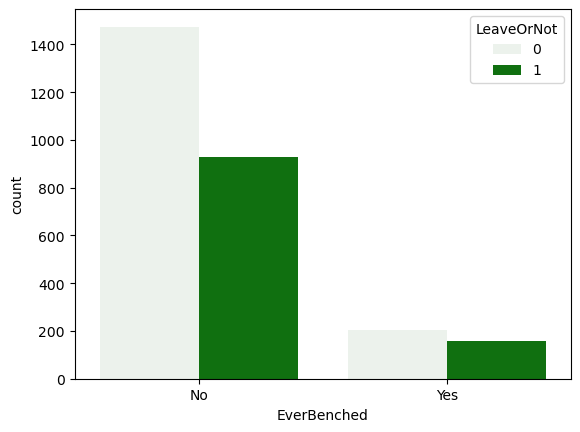

In [85]:
sns.countplot(data=df, x= df["EverBenched"], hue="LeaveOrNot", color="green")

Can obsereve a little trend of employees of have ever **benched, leaving** the company

In [137]:
df["ExperienceInCurrentDomain"].value_counts()

2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: ExperienceInCurrentDomain, dtype: int64

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

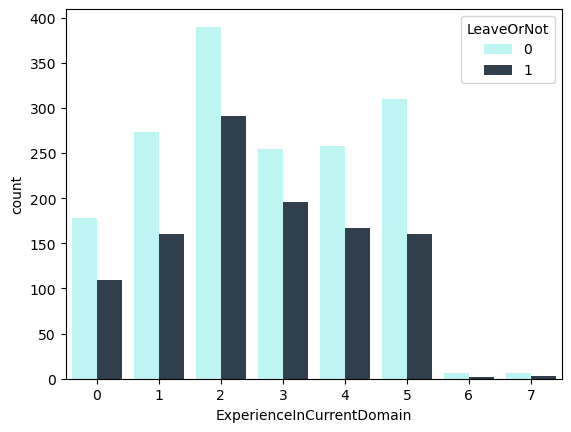

In [149]:
palt = ["#b5fdfa", "#2c3e50"] 
sns.set_palette(palt)
sns.countplot(data=df, x= df["ExperienceInCurrentDomain"], hue="LeaveOrNot")

Its difficult to predict any kind of trend in this plot

In [154]:
le=LabelEncoder()
df["Education"]= le.fit_transform(df["Education"])
df["Gender"]=le.fit_transform(df["Gender"])
df["EverBenched"]=le.fit_transform(df["EverBenched"])
df["City"]=le.fit_transform(df["City"])

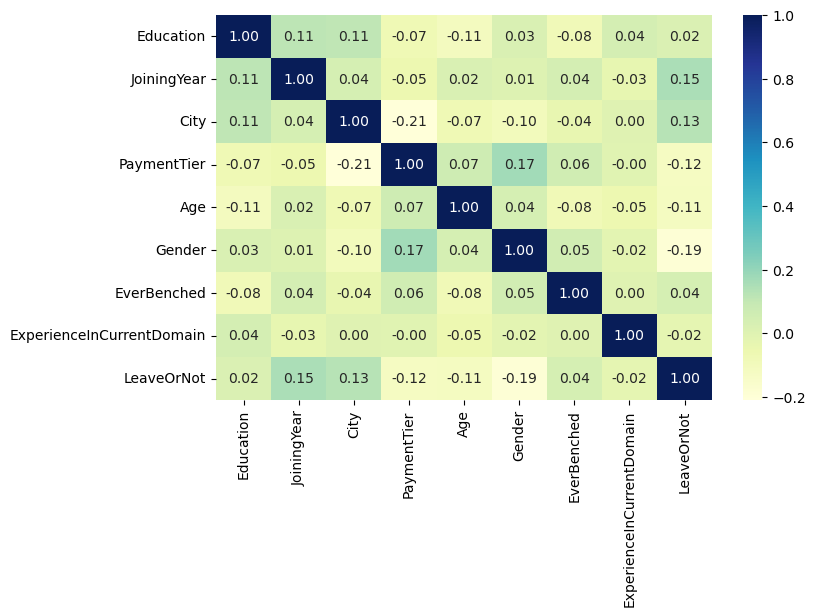

In [159]:
# Lets plot the correlation matrix 
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap = "YlGnBu")
plt.show()

From the previous discussion and confirmance form here,their seems to be relation in - 
- Joning Year and Employee Retention
- City and Employee Retention
- Gender and Employee Retention
- Salary and Employee Retention

Also few insights can also be driven by the relation of - 
- Salary and Gender
- Salary and City

## Few other usefull plots used in the Research Paper to derive few insights

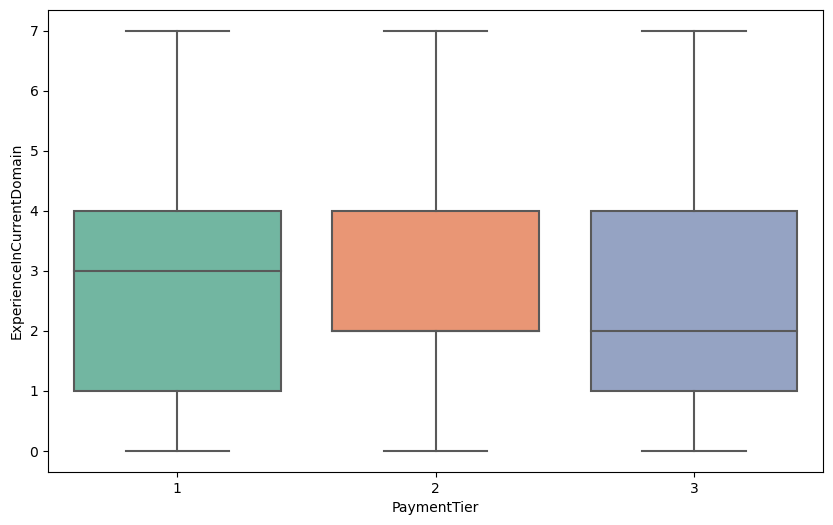

In [232]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PaymentTier', y='ExperienceInCurrentDomain', data=df, palette='Set2')
plt.show()

 - Here we can understand that the median in teir one salary is in upper side, indicating that more people of 3 years of experience have teir 1 salary but few people wiht less experience also have tier 1 salary. 
<br>
 - Similar conclusion can also be drawn about teir 3 salary employees

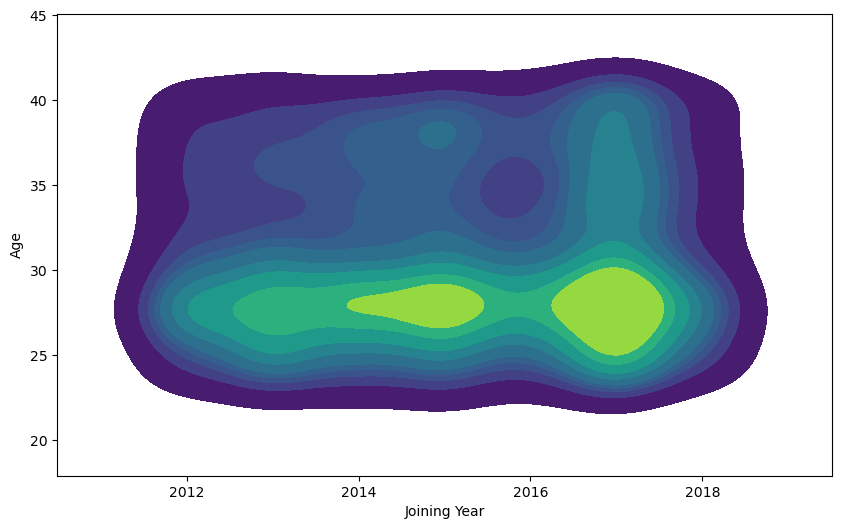

In [233]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='JoiningYear', y='Age', cmap='viridis', fill=True)
plt.xlabel('Joining Year')
plt.ylabel('Age')
plt.show()

We can extract that most people joined in around 2017 and are of age 25 to 28.

## Train-Test Split

In [222]:
x_train, x_test, y_train,y_test = train_test_split(df.drop(["LeaveOrNot"], axis=1), 
                                        df["LeaveOrNot"],   random_state=1,   test_size=0.3,
                                        stratify=df["LeaveOrNot"])

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1934, 8) (1934,) (830, 8) (830,)


The split is done with random seed and **testing set** comprises **30%** of the total data. Used **stratify** to preserve the distribution of the target in both the sets.

In [224]:
sm = SMOTE(sampling_strategy="minority", random_state=1)
xts, yts = sm.fit_resample(x_train, y_train)
xts, yts

(      Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
 0             0         2014     2            3   28       1            1   
 1             1         2014     1            3   28       0            0   
 2             0         2016     1            3   26       1            0   
 3             1         2015     1            3   37       1            0   
 4             0         2012     2            3   24       1            1   
 ...         ...          ...   ...          ...  ...     ...          ...   
 2341          0         2014     2            2   29       0            0   
 2342          0         2013     1            3   40       0            0   
 2343          0         2015     1            1   25       0            0   
 2344          0         2018     2            3   25       0            0   
 2345          0         2015     2            2   39       0            0   
 
       ExperienceInCurrentDomain  
 0                         

**Balancing** the dataset with **SMOTE**.

RandomForestClassifier(max_features=3, min_samples_split=10)
----------------------
Accuracy:[0.8313253012048193]
F1-Score:[0.7756410256410255]
Precision:[0.7400611620795107]
Recall:[0.8148148148148148]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

           0      0.841     0.891     0.865       503
           1      0.815     0.740     0.776       327

    accuracy                          0.831       830
   macro avg      0.828     0.815     0.820       830
weighted avg      0.830     0.831     0.830       830

Confusion_Matrix


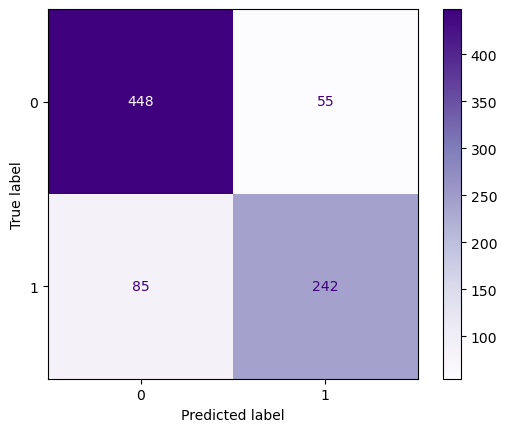

In [226]:
rf=RandomForestClassifier()

hyper_params = {"criterion":["gini"],
                "min_samples_leaf":[1,3,10],
                "max_features": [1,3,10],
                "n_estimators":[100,300, 400, 500, 600],
                "min_samples_split":[2,3,10]
                }
    
model=GridSearchCV(rf, hyper_params, cv=5, scoring="f1_macro", n_jobs=-1)
model.fit(x_train_smote,y_train_smote)
y_pred= model.predict(x_test)
print(model.best_estimator_)

print("----------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")
print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Purples")
plt.show()

Used **Random Forest** Classifier with **hyperparameter tuning** using **GridSearchCV**. <br>

After fitting the model on the resampled training set (using SMOTE), predictions are made on the test set, and the results are estimated.